# II. Using Glove Embedding and look at Emoji Clusters

<a id='table'></a>
## Table of Contents
<ul>
<li><a href="#loading_emojis">1. Loading Emojipedia DataFrame and some preprocessing</a></li>
<li><a href="#glove_embedding">2. Glove Embedding</a></li>
<li><a href="#clusters">3. Analyzing different Clusters</a></li>
<li><a href="#help_function">4. Creating a help DataFrame for Dataset Creation </a></li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import math
import pickle
import spacy
nlp = spacy.load('en_core_web_lg')
from helper_functions import *
import seaborn as sb

### Text used for test 

In [2]:
aladdin = open("Books/aladdin_page.txt").read()
file = nlp(aladdin)

In [3]:
grimm = open("Books/grimm_small.txt").read()
file_grimm = nlp(grimm)

In [4]:
greek = open("Books/Greek_heroes_small.txt").read()
file_greek = nlp(greek)

In [5]:
for num, sentence in enumerate(file.sents):
    print(f'{num}: {sentence}')

0: THE STORY OF ALADDIN AND HIS MAGICAL LAMP

1: There once lived, in one of the large and rich cities of China, a tailor, named Mustapha.
2: He was very poor.
3: He could hardly, by his daily labor, maintain himself and his family, which consisted only of his wife and a son.


4: His son, who was called Aladdin, was a very careless and idle fellow.
5: He was disobedient to his father and mother, and would go out early in the morning and stay out all day, playing in the streets and public places with idle children of his own age.


6: When he was old enough to learn a trade, his father took him into his own shop, and taught him how to use his needle; but all his father’s endeavors to keep him to his work were vain, for no sooner was his back turned than he was gone for that day.
7: Mustapha chastised him; but Aladdin was incorrigible, and his father, to his great grief, was forced to abandon him to his idleness, and was so much troubled about him that he fell sick and died in a few mon

<a id='loading_emojis'></a>
## 1. Loading Emojipedia DataFrame
<a href="#table">Back to the top </a>

In [6]:
# Loading the dataframe obtained after scraping EmojiPedia
csv_loc = "../Emojipedia/emojipedia_df_02.csv"
emoji_df = pd.read_csv(csv_loc)

In [7]:
emoji_df.sample(10, random_state=123)

Unnamed: 0 emoji_symbol            emoji_name  \
582          582            🦞               Lobster   
310          310         🧝‍♂️           ‍♂️ Man Elf   
1735        1735           🇹🇻        🇻 Flag: Tuvalu   
597          597            🌙         Crescent Moon   
1587        1587           🇬🇬      🇬 Flag: Guernsey   
182          182         👱‍♂️   ‍♂️ Man: Blond Hair   
1014        1014           ⛱️  ️ Umbrella on Ground   
1590        1590           🇬🇱     🇱 Flag: Greenland   
706          706            🍤          Fried Shrimp   
805          805           🎖️      ️ Military Medal   

                           emoji_code  \
582                           U+1F99E   
310   U+1F9DD, U+200D, U+2642, U+FE0F   
1735                 U+1F1F9, U+1F1FB   
597                           U+1F319   
1587                 U+1F1EC, U+1F1EC   
182   U+1F471, U+200D, U+2642, U+FE0F   
1014                   U+26F1, U+FE0F   
1590                 U+1F1EC, U+1F1F1   
706                           U+1F364   
805                   U+1F396, U+FE0F   

                                      emoji_description  
582   A lobster, a large crustacean with a prominent...  
310   The Man Elf emoji is aZWJ sequencecombining🧝El...  
1735  The flag forTuvalu, which may show as the lett...  
597   A crescent moon, as in itswaxing crescentphase...  
1587  The flag forGuernsey, which may show as the le...  
182   The male version of the👱Person With Blond Hair...  
1014  A large, open umbrella, as provides shade at a...  
1590  The flag for Greenland, which may show as the ...  
706   A prawn or shrimp breaded and deep-fried golde...  
805   Aribbon and medallion generallyawardedto apers...

In [8]:
emoji_df["emoji_name_flag"] = emoji_df["emoji_name"].apply(lambda x: remove_flag(x) )

In [9]:
emoji_df["emoji_description_flag"] = emoji_df.apply(lambda row: row.emoji_name_flag + " " + row.emoji_description,axis=1)

In [10]:
emoji_df.sample(5, random_state=123)

Unnamed: 0 emoji_symbol        emoji_name  \
582          582            🦞           Lobster   
310          310         🧝‍♂️       ‍♂️ Man Elf   
1735        1735           🇹🇻    🇻 Flag: Tuvalu   
597          597            🌙     Crescent Moon   
1587        1587           🇬🇬  🇬 Flag: Guernsey   

                           emoji_code  \
582                           U+1F99E   
310   U+1F9DD, U+200D, U+2642, U+FE0F   
1735                 U+1F1F9, U+1F1FB   
597                           U+1F319   
1587                 U+1F1EC, U+1F1EC   

                                      emoji_description emoji_name_flag  \
582   A lobster, a large crustacean with a prominent...         Lobster   
310   The Man Elf emoji is aZWJ sequencecombining🧝El...     ‍♂️ Man Elf   
1735  The flag forTuvalu, which may show as the lett...          Tuvalu   
597   A crescent moon, as in itswaxing crescentphase...   Crescent Moon   
1587  The flag forGuernsey, which may show as the le...        Guernsey   

                                 emoji_description_flag  
582   Lobster A lobster, a large crustacean with a p...  
310   ‍♂️ Man Elf The Man Elf emoji is aZWJ sequence...  
1735   Tuvalu The flag forTuvalu, which may show as ...  
597   Crescent Moon A crescent moon, as in itswaxing...  
1587   Guernsey The flag forGuernsey, which may show...

### Make a copy of the emojis df 

In [11]:
# We'll work on a copy of the original dataframe
emojis = emoji_df.copy()

### NLP preprocessing on description

In [12]:
emojis.head(2)

Unnamed: 0 emoji_symbol                   emoji_name emoji_code  \
0           0            😀                Grinning Face    U+1F600   
1           1            😃  Grinning Face with Big Eyes    U+1F603   

                                   emoji_description  \
0  A yellow face with simple, open eyes and a bro...   
1  A yellow face with smiling eyes and a broad, o...   

               emoji_name_flag  \
0                Grinning Face   
1  Grinning Face with Big Eyes   

                              emoji_description_flag  
0  Grinning Face A yellow face with simple, open ...  
1  Grinning Face with Big Eyes A yellow face with...

> We'll put the descriptions in lower cases, remove the stopwords and punctuations

In [13]:
help(some_preprocessing)

Help on function some_preprocessing in module helper_functions:

some_preprocessing(description, remove_stopw=True)
    Returns the preprocessed description.
    
    Parameters:
        description (str): The string description of the emoji, that will be
                           preprocessed.
    
        remove_stopw (bool): Default = True, if False => Stopwords aren't removed
    
    Returns:
        some_preprocessing(description): A list of string of lower case tokens
        punctuations and stopwords)



#### Here using descriptions without "Flags:" and concatenated with the emoji_nam

In [14]:
# Adding a column with preprocessed description
emojis["preprocessed_description"] = emojis["emoji_description_flag"].apply(lambda x: some_preprocessing(x,True))

In [15]:
# Test
emojis.sample(5, random_state=123)

Unnamed: 0 emoji_symbol        emoji_name  \
582          582            🦞           Lobster   
310          310         🧝‍♂️       ‍♂️ Man Elf   
1735        1735           🇹🇻    🇻 Flag: Tuvalu   
597          597            🌙     Crescent Moon   
1587        1587           🇬🇬  🇬 Flag: Guernsey   

                           emoji_code  \
582                           U+1F99E   
310   U+1F9DD, U+200D, U+2642, U+FE0F   
1735                 U+1F1F9, U+1F1FB   
597                           U+1F319   
1587                 U+1F1EC, U+1F1EC   

                                      emoji_description emoji_name_flag  \
582   A lobster, a large crustacean with a prominent...         Lobster   
310   The Man Elf emoji is aZWJ sequencecombining🧝El...     ‍♂️ Man Elf   
1735  The flag forTuvalu, which may show as the lett...          Tuvalu   
597   A crescent moon, as in itswaxing crescentphase...   Crescent Moon   
1587  The flag forGuernsey, which may show as the le...        Guernsey   

                                 emoji_description_flag  \
582   Lobster A lobster, a large crustacean with a p...   
310   ‍♂️ Man Elf The Man Elf emoji is aZWJ sequence...   
1735   Tuvalu The flag forTuvalu, which may show as ...   
597   Crescent Moon A crescent moon, as in itswaxing...   
1587   Guernsey The flag forGuernsey, which may show...   

                               preprocessed_description  
582   [lobster, lobster, large, crustacean, prominen...  
310   [man, elf, man, elf, emoji, azwj, width, sign,...  
1735  [tuvalu, flag, fortuvalu, may, show, letterstv...  
597   [crescent, moon, crescent, moon, itswaxing, cr...  
1587  [guernsey, flag, forguernsey, may, show, lette...

In [16]:
# Name preprocessing
emojis["preprocessed_name"] = emojis["emoji_name_flag"].apply(lambda x: some_preprocessing(x))

In [17]:
emojis.sample(3, random_state=123)

Unnamed: 0 emoji_symbol      emoji_name  \
582          582            🦞         Lobster   
310          310         🧝‍♂️     ‍♂️ Man Elf   
1735        1735           🇹🇻  🇻 Flag: Tuvalu   

                           emoji_code  \
582                           U+1F99E   
310   U+1F9DD, U+200D, U+2642, U+FE0F   
1735                 U+1F1F9, U+1F1FB   

                                      emoji_description emoji_name_flag  \
582   A lobster, a large crustacean with a prominent...         Lobster   
310   The Man Elf emoji is aZWJ sequencecombining🧝El...     ‍♂️ Man Elf   
1735  The flag forTuvalu, which may show as the lett...          Tuvalu   

                                 emoji_description_flag  \
582   Lobster A lobster, a large crustacean with a p...   
310   ‍♂️ Man Elf The Man Elf emoji is aZWJ sequence...   
1735   Tuvalu The flag forTuvalu, which may show as ...   

                               preprocessed_description preprocessed_name  
582   [lobster, lobster, large, crustacean, prominen...         [lobster]  
310   [man, elf, man, elf, emoji, azwj, width, sign,...        [man, elf]  
1735  [tuvalu, flag, fortuvalu, may, show, letterstv...          [tuvalu]

<a id='glove_embedding'></a>
## 2. Glove Embedding (Global Vector)
<a href="#table">Back to the top </a>

> **Global Vectors for Word Representation**, or GloVe, is an _“unsupervised learning algorithm for obtaining vector representations for words.”_ Simply put, GloVe allows us to take a corpus of text, and intuitively transform each word in that corpus into a position in a high-dimensional space. This means that similar words will be placed together.


### a. Loading the vectors

> Before we load the vectors in code, we have to understand how the text file is formatted.
Each line of the text file contains a word, followed by N numbers. The N numbers describe the vector of the word’s position. N may vary depending on which vectors you downloaded, for me, N is 50, since I am using glove.6B.50d.
_Here is an example line from the text file, shortened to the first three dimensions:_

**business** 0.023693 0.13316 0.023131 ...

In [18]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip

In [19]:
# Writing down in a dictionnary
"""
glove_lookup = {}

with open("glove.6B.100d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        glove_lookup[word] = vector  
"""

'\nglove_lookup = {}\n\nwith open("glove.6B.100d.txt", \'r\') as f:\n    for line in f:\n        values = line.split()\n        word = values[0]\n        vector = np.asarray(values[1:], "float32")\n        glove_lookup[word] = vector  \n'

### b. Saving and Loading the lookup dictionnary with Pickle

In [20]:
filename = 'Saved_Embeddings/glove_lookup'

In [21]:
## ONLY EXECUTE THIS CELL ONCE FOR SAVING THE GLOVE LOOKUP DICTIONARY
# Save the Glove Embedding Lookup Table
"""
outfile = open(filename,'wb')
pickle.dump(glove_lookup,outfile)
outfile.close()
"""

"\noutfile = open(filename,'wb')\npickle.dump(glove_lookup,outfile)\noutfile.close()\n"

In [22]:
## ONLY EXECUTE THIS CELL ONCE FOR LOADING THE GLOVE LOOKUP DICTIONARY
# Loading the Glove Embedding Lookup Table
infile = open(filename,'rb')
glove_lookup = pickle.load(infile)
infile.close()

### c. Average Glove vector for the descriptions

> **Basic Idea:** Getting the Glove Vector representation of each word present in the cleaned description and aggregating those by averaging to 1 Vector. 

In [23]:
help(avg_glove_vector)

Help on function avg_glove_vector in module helper_functions:

avg_glove_vector(descr_list, emoji_2_embedding_lookup)
    Returns from a preprocessed list of the emoji description the average embedding
    
    Parameters:
        descr_list (list): List containing string tokens of preprocessed emoji description
    
        emoji_2_embedding_lookup (dict): dictionnary with as keys the words of the
                        corpus and the values the vector of that word
    
    Returns:
        An embedding vector with the same dimensions as the Word Embedding used



In [24]:
emojis["avg_glove_embedding"] = emojis['preprocessed_description']\
                                            .apply(lambda x: avg_glove_vector(x, glove_lookup))

In [25]:
emojis["weighted_avg_glove_embedding"] = emojis['preprocessed_description']\
                                            .apply(lambda x: weighted_avg_glove_vector(x, glove_lookup))

In [26]:
emojis["avg_glove_name_embedding"] = emojis['preprocessed_name']\
                                            .apply(lambda x: avg_glove_vector(x, glove_lookup))

In [27]:
emojis.sample(5, random_state=123)

Unnamed: 0 emoji_symbol        emoji_name  \
582          582            🦞           Lobster   
310          310         🧝‍♂️       ‍♂️ Man Elf   
1735        1735           🇹🇻    🇻 Flag: Tuvalu   
597          597            🌙     Crescent Moon   
1587        1587           🇬🇬  🇬 Flag: Guernsey   

                           emoji_code  \
582                           U+1F99E   
310   U+1F9DD, U+200D, U+2642, U+FE0F   
1735                 U+1F1F9, U+1F1FB   
597                           U+1F319   
1587                 U+1F1EC, U+1F1EC   

                                      emoji_description emoji_name_flag  \
582   A lobster, a large crustacean with a prominent...         Lobster   
310   The Man Elf emoji is aZWJ sequencecombining🧝El...     ‍♂️ Man Elf   
1735  The flag forTuvalu, which may show as the lett...          Tuvalu   
597   A crescent moon, as in itswaxing crescentphase...   Crescent Moon   
1587  The flag forGuernsey, which may show as the le...        Guernsey   

                                 emoji_description_flag  \
582   Lobster A lobster, a large crustacean with a p...   
310   ‍♂️ Man Elf The Man Elf emoji is aZWJ sequence...   
1735   Tuvalu The flag forTuvalu, which may show as ...   
597   Crescent Moon A crescent moon, as in itswaxing...   
1587   Guernsey The flag forGuernsey, which may show...   

                               preprocessed_description preprocessed_name  \
582   [lobster, lobster, large, crustacean, prominen...         [lobster]   
310   [man, elf, man, elf, emoji, azwj, width, sign,...        [man, elf]   
1735  [tuvalu, flag, fortuvalu, may, show, letterstv...          [tuvalu]   
597   [crescent, moon, crescent, moon, itswaxing, cr...  [crescent, moon]   
1587  [guernsey, flag, forguernsey, may, show, lette...        [guernsey]   

                                    avg_glove_embedding  \
582   [-0.2716405117864032, 0.2808049788050678, 0.11...   
310   [0.1486270010471344, 0.4484175965189934, 0.063...   
1735  [-0.2440182507270947, 0.3497652434743941, 0.08...   
597   [-0.11394343740539625, 0.23389391019009054, -0...   
1587  [-0.13225824537221342, 0.22941024834290147, -0...   

                           weighted_avg_glove_embedding  \
582   [-0.256868679533996, 0.31566165149535824, 0.14...   
310   [0.2597739982604981, 0.43342719703912735, 0.05...   
1735  [-0.16290653874543873, 0.3445266151951777, 0.0...   
597   [-0.09958068099380894, 0.2492651172320951, 0.0...   
1587  [-0.10220182024161606, 0.3131224657682812, 0.0...   

                               avg_glove_name_embedding  
582   [-0.9065200090408325, 0.7711099982261658, 0.14...  
310   [0.7651650011539459, 0.22278400138020515, 0.27...  
1735  [-1.1734000444412231, 0.42361998558044434, 0.6...  
597   [-0.22425499558448792, 0.2346320077776909, 0.0...  
1587  [-0.27932000160217285, -0.5392199754714966, -0...

#### Check if some some empty vectors

In [28]:
import warnings
warnings.filterwarnings('ignore')
emojis[emojis.avg_glove_embedding==""]

Unnamed: 0 emoji_symbol     emoji_name emoji_code emoji_description  \
1236        1236            🕧  Twelve-Thirty    U+1F567     Twelve-Thirty   
1238        1238            🕜     One-Thirty    U+1F55C        One-Thirty   
1240        1240            🕝     Two-Thirty    U+1F55D        Two-Thirty   
1242        1242            🕞   Three-Thirty    U+1F55E      Three-Thirty   
1244        1244            🕟    Four-Thirty    U+1F55F       Four-Thirty   
1246        1246            🕠    Five-Thirty    U+1F560       Five-Thirty   
1248        1248            🕡     Six-Thirty    U+1F561        Six-Thirty   
1250        1250            🕢   Seven-Thirty    U+1F562      Seven-Thirty   
1252        1252            🕣   Eight-Thirty    U+1F563      Eight-Thirty   
1254        1254            🕤    Nine-Thirty    U+1F564       Nine-Thirty   
1256        1256            🕥     Ten-Thirty    U+1F565        Ten-Thirty   
1258        1258            🕦  Eleven-Thirty    U+1F566     Eleven-Thirty   

     emoji_name_flag       emoji_description_flag preprocessed_description  \
1236   Twelve-Thirty  Twelve-Thirty Twelve-Thirty                       []   
1238      One-Thirty        One-Thirty One-Thirty                       []   
1240      Two-Thirty        Two-Thirty Two-Thirty                       []   
1242    Three-Thirty    Three-Thirty Three-Thirty                       []   
1244     Four-Thirty      Four-Thirty Four-Thirty                       []   
1246     Five-Thirty      Five-Thirty Five-Thirty                       []   
1248      Six-Thirty        Six-Thirty Six-Thirty                       []   
1250    Seven-Thirty    Seven-Thirty Seven-Thirty                       []   
1252    Eight-Thirty    Eight-Thirty Eight-Thirty                       []   
1254     Nine-Thirty      Nine-Thirty Nine-Thirty                       []   
1256      Ten-Thirty        Ten-Thirty Ten-Thirty                       []   
1258   Eleven-Thirty  Eleven-Thirty Eleven-Thirty                       []   

     preprocessed_name avg_glove_embedding weighted_avg_glove_embedding  \
1236                []                                                    
1238                []                                                    
1240                []                                                    
1242                []                                                    
1244                []                                                    
1246                []                                                    
1248                []                                                    
1250                []                                                    
1252                []                                                    
1254                []                                                    
1256                []                                                    
1258                []                                                    

     avg_glove_name_embedding  
1236                           
1238                           
1240                           
1242                           
1244                           
1246                           
1248                           
1250                           
1252                           
1254                           
1256                           
1258

In [29]:
# Shape before
emojis.shape

(1764, 12)

In [30]:
# Let's remove those rows
warnings.filterwarnings('ignore')
emojis = emojis[emojis.avg_glove_embedding!=""]

In [31]:
# Test: shape after
emojis.shape

(1752, 12)

### Keeping the list of emoji symbols and names

In [32]:
emoji_symbols =  list(emojis.emoji_symbol)
emoji_names =  list(emojis.emoji_name)

### d. Vector Visualization with  t-SNE 

In [33]:
glove_vectors = list(emojis.avg_glove_embedding)

In [34]:
weighted_glove_vectors = list(emojis.weighted_avg_glove_embedding)

In [35]:
name_glove_vectors = list(emojis.avg_glove_name_embedding)

In [36]:
help(building_tsne_df)

Help on function building_tsne_df in module helper_functions:

building_tsne_df(emoji_symbols, emoji_names, emb_emoji_vectors)
    Returns a DataFrame with a t-SNE 2D reduction of the emoji description embedding
    
    Parameters:
        emoji_symbols (list): List of emoji symbols
    
        emoji_names (list): List of correlated emoji names
    
        emb_emoji_vectors(list): list of embedded emoji description
    
    Returns:
        An embedding vector with the same dimensions as the Word Embedding used



In [37]:
help(tsne_plot)

Help on function tsne_plot in module helper_functions:

tsne_plot(tsne_2d_df, graph_title)
    Returns a 2D plotly graph of the t-SNE dimension reduction of the emoji descripition embedding
    
    Parameters:
        tsne_2d_df (DataFrame): DataFrame obtained with building_tsne_df(emoji_symbols,
        emoji_names, emb_emoji_vectors)
    
        graph_title (str): Desired title of the graph
    
    Returns:
        A 2D plotly graph of the t-SNE dimension reduction of the emoji descripition embedding



#### t-SNE : Averaging the Glove Embedding

In [38]:
glove_tsne_df = building_tsne_df(emoji_symbols, emoji_names, glove_vectors)

In [39]:
graph_title = 'Emojis Description with Glove Vector Space'
tsne_plot(glove_tsne_df, graph_title)

#### t-SNE : Weighted average of the Glove Embedding

In [40]:
weighted_glove_tsne_df = building_tsne_df(emoji_symbols, emoji_names, weighted_glove_vectors)

In [41]:
graph_title = 'Emojis Description with Glove Vector Space'
tsne_plot(weighted_glove_tsne_df, graph_title)

#### t-SNE: Glove embedding on the Emojinames

In [42]:
def clean_name_glove_vector(name_glove_vectors, emoji_symbols, emoji_names):
    # Work with copy of the original lists
    emoji_symbols_cp = emoji_symbols.copy()
    emoji_names_cp = emoji_names.copy()
    
    list_glove = [len(x) for x in name_glove_vectors]
    set_glove = set(list_glove)
    
    while len(set_glove)==2:
        min_arg = np.argmin(list_glove)
        
        emoji_names_cp.pop(min_arg)
        emoji_symbols_cp.pop(min_arg)
        name_glove_vectors.pop(min_arg)
        
        list_glove = [len(x) for x in name_glove_vectors]
        set_glove = set(list_glove)
        
    
    return name_glove_vectors, emoji_symbols_cp, emoji_names_cp
        
        

In [43]:
name_glove_vectors, emoji_symbols_cp, emoji_names_cp = \
                                        clean_name_glove_vector(name_glove_vectors, emoji_symbols, emoji_names)

In [44]:
set([len(x) for x in name_glove_vectors])

{100}

In [45]:
len(name_glove_vectors)

1737

In [47]:
name_tsne_df = building_tsne_df(emoji_symbols_cp, emoji_names_cp, name_glove_vectors)

In [48]:
graph_title = 'Emojis Names with Glove Vector Space'
tsne_plot(name_tsne_df, graph_title)

### e. Finding Similar Vectors

> source: https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db

In [49]:
# Building the emoji to averaged description GloVe Embedding Dictionnary
emoji_symb2emb_dic = {}
for i in range(len(emoji_symbols)):
    emoji_symb2emb_dic[emoji_symbols[i]] = glove_vectors[i]

In [50]:
# Building the emoji to averaged description GloVe Embedding Dictionnary
weighted_emoji_symb2emb_dic = {}
for i in range(len(emoji_symbols)):
    weighted_emoji_symb2emb_dic[emoji_symbols[i]] = weighted_glove_vectors[i]

In [52]:
# Building the emoji to averaged description GloVe Embedding Dictionnary
name_emoji_symb2emb_dic = {}
for i in range(len(emoji_symbols_cp)):
    name_emoji_symb2emb_dic[emoji_symbols_cp[i]] = name_glove_vectors[i]

In [53]:
with open('Saved_Variables/emoji_symb2emb_dic.pkl', 'wb') as f:
    pickle.dump(emoji_symb2emb_dic, f)

In [54]:
with open('Saved_Variables/weighted_emoji_symb2emb_dic.pkl', 'wb') as f:
    pickle.dump(weighted_emoji_symb2emb_dic, f)

In [55]:
with open('Saved_Variables/name_emoji_symb2emb_dic.pkl', 'wb') as f:
    pickle.dump(name_emoji_symb2emb_dic, f)

In [56]:
emoji_symb2emb_dic['😀']

array([-0.05287931,  0.35330024,  0.45313351, -0.13295578,  0.07113995,
        0.38893072, -0.30117105,  0.08904886, -0.06914768, -0.31321157,
       -0.27208137,  0.02652203,  0.40184349,  0.06646805,  0.30497119,
        0.21267441, -0.18408086,  0.2040733 ,  0.09900594, -0.13228008,
        0.06848116,  0.1979204 , -0.10106205, -0.1621519 ,  0.51346106,
        0.49147178, -0.12452104, -0.27948862,  0.10647178, -0.24829721,
        0.22111806,  0.13768019, -0.01026403, -0.11431446,  0.34439044,
        0.05598913, -0.20078903,  0.00435814,  0.21077687, -0.03705975,
        0.01968127, -0.43466948,  0.09958135, -0.12905254, -0.17201343,
        0.12522246,  0.17743732,  0.24127097, -0.04050943, -0.37546649,
        0.00797795, -0.21964867,  0.2114726 ,  0.85280187, -0.05459243,
       -1.49053551,  0.11900689, -0.01379524,  0.74003682,  0.11358514,
        0.19801225,  0.84991567, -0.31642707,  0.08870152,  0.36383473,
        0.09314035,  0.47389802,  0.13241055, -0.00268527, -0.09

In [57]:
weighted_emoji_symb2emb_dic['😀']

array([-0.03932482,  0.33400499,  0.47084886, -0.23293118, -0.00273713,
        0.40520008, -0.31425981,  0.09511576, -0.03864261, -0.31840809,
       -0.31292817,  0.10720602,  0.44749772,  0.19800244,  0.31509318,
        0.19727964, -0.16986476,  0.26235941,  0.11427829, -0.10794184,
        0.07329521,  0.16866799, -0.15866557, -0.11590536,  0.60908102,
        0.64398222, -0.12694572, -0.2974585 ,  0.17003461, -0.29030735,
        0.29232551,  0.14896175, -0.00551713, -0.06713118,  0.38152623,
        0.01374751, -0.24093767, -0.02109156,  0.23036735, -0.07656631,
       -0.05687436, -0.45611269,  0.05104428, -0.23559539, -0.09789713,
        0.22649026,  0.1739345 ,  0.21601896,  0.02731332, -0.37860373,
       -0.01314771, -0.11817206,  0.16587021,  0.99830595, -0.01914803,
       -1.53849037,  0.14597784, -0.07195389,  0.75444861,  0.14559509,
        0.29128402,  0.91373465, -0.35699252,  0.07663713,  0.36594494,
        0.15614662,  0.37020365,  0.10435714, -0.00890647, -0.18

In [58]:
name_emoji_symb2emb_dic['😀']

array([ 0.05954   ,  0.372835  ,  0.78881499, -0.31443501,  0.21255001,
        0.56426999, -0.52526999,  0.042655  , -0.33171701, -0.16734001,
       -0.36959   ,  0.120255  ,  0.47107001, -0.024735  ,  0.206205  ,
        0.2425365 , -0.31671999,  0.262832  , -0.129585  , -0.56348   ,
        0.0647529 ,  0.25690799, -0.059376  ,  0.26823049,  0.64649999,
        0.62104499,  0.04127   , -0.31733449,  0.21869999, -0.238343  ,
        0.32870001, -0.41697   , -0.0523715 , -0.21812   ,  0.33775   ,
       -0.005755  , -0.402775  , -0.30124   ,  0.35509949, -0.01566   ,
       -0.13993001, -0.42058449,  0.362475  ,  0.08340999, -0.386327  ,
        0.248295  ,  0.35624999,  0.37473001, -0.55581   , -0.34611002,
        0.0871855 , -0.572795  ,  0.17209501,  1.17304003, -0.019005  ,
       -1.06018146, -0.02099001, -0.066375  ,  0.15886497,  0.16689501,
        0.40708502,  0.82927999, -0.63726498, -0.18939   ,  0.16269501,
        0.27684999,  0.89049   ,  0.54224001, -0.36869201,  0.22

In [59]:
help(translate_text)

Help on function translate_text in module helper_functions:

translate_text(spacy_nlp_file, emoji_2_embedding_lookup, emoji_symb2emb_dic, distance_type='euclidean')
    Returns the input spacy_file split in sentences with the closest emoji
    
    Parameters:
        spacy_nlp_file) (spacy nlp object) : Text as nlp object that we want to translate
    
        emoji_2_embedding_lookup (dict): dictionnary with as keys the words of the
                        corpus and the values the vector of that word
    
        emoji_symb2emb_dic (dict): keys emoji_symbols values averaged description Embedding
    
        distance_type (str): default is "euclidiean", but also "cosine" possible
    
    Returns:
        The input spacy_file split in sentences with the closest emoji



In [60]:
# With Euclidean Distance
translate_text(file, glove_lookup, emoji_symb2emb_dic)

0: THE STORY OF ALADDIN AND HIS MAGICAL LAMP

['💎', '🔦', '🕯️']

1: There once lived, in one of the large and rich cities of China, a tailor, named Mustapha.
['☪️', '🔞', '\U0001f960']

2: He was very poor.
['🚸', '🏥', '👨\u200d⚕️']

3: He could hardly, by his daily labor, maintain himself and his family, which consisted only of his wife and a son.


['👪', '🙋', '🏠']

4: His son, who was called Aladdin, was a very careless and idle fellow.
['🙉', '🙈', '👹']

5: He was disobedient to his father and mother, and would go out early in the morning and stay out all day, playing in the streets and public places with idle children of his own age.


['💑', '🚶', '💏']

6: When he was old enough to learn a trade, his father took him into his own shop, and taught him how to use his needle; but all his father’s endeavors to keep him to his work were vain, for no sooner was his back turned than he was gone for that day.
['👻', '🤗', '💑']

7: Mustapha chastised him; but Aladdin was incorrigible, and his father,

In [61]:
# With Euclidean Distance and weighted averages
weighted_translate_text(file, glove_lookup, weighted_emoji_symb2emb_dic)

0: THE STORY OF ALADDIN AND HIS MAGICAL LAMP

['💡', '🔦', '🕯️']

1: There once lived, in one of the large and rich cities of China, a tailor, named Mustapha.
['🌎', '🚋', '🚊']

2: He was very poor.
['🚸', '\U0001f9d1\u200d🤝\u200d\U0001f9d1', '🏥']

3: He could hardly, by his daily labor, maintain himself and his family, which consisted only of his wife and a son.


['🤶', '👪', '👨\u200d👨\u200d👦']

4: His son, who was called Aladdin, was a very careless and idle fellow.
['👨\u200d🏫', '🙉', '👽']

5: He was disobedient to his father and mother, and would go out early in the morning and stay out all day, playing in the streets and public places with idle children of his own age.


['💑', '💏', '🚸']

6: When he was old enough to learn a trade, his father took him into his own shop, and taught him how to use his needle; but all his father’s endeavors to keep him to his work were vain, for no sooner was his back turned than he was gone for that day.
['👻', '\U0001f9af', '👋']

7: Mustapha chastised him; b

In [62]:
# With Cosine Distance
translate_text(file, glove_lookup, emoji_symb2emb_dic, "cosine")

0: THE STORY OF ALADDIN AND HIS MAGICAL LAMP

['💎', '🔦', '🕯️']

1: There once lived, in one of the large and rich cities of China, a tailor, named Mustapha.
['🏠', '🔞', '☪️']

2: He was very poor.
['🚸', '🏥', '👨\u200d⚕️']

3: He could hardly, by his daily labor, maintain himself and his family, which consisted only of his wife and a son.


['👪', '🙋', '🏠']

4: His son, who was called Aladdin, was a very careless and idle fellow.
['👨\u200d👨\u200d👧\u200d👦', '👨\u200d👨\u200d👦', '👻']

5: He was disobedient to his father and mother, and would go out early in the morning and stay out all day, playing in the streets and public places with idle children of his own age.


['💑', '🚶', '🚸']

6: When he was old enough to learn a trade, his father took him into his own shop, and taught him how to use his needle; but all his father’s endeavors to keep him to his work were vain, for no sooner was his back turned than he was gone for that day.
['👻', '🙋', '🤗']

7: Mustapha chastised him; but Aladdin was inc

In [63]:
# With Cosine Distance and weighted average
weighted_translate_text(file, glove_lookup, weighted_emoji_symb2emb_dic, "cosine")

0: THE STORY OF ALADDIN AND HIS MAGICAL LAMP

['💡', '🔦', '🕯️']

1: There once lived, in one of the large and rich cities of China, a tailor, named Mustapha.
['🌎', '🚋', '🚸']

2: He was very poor.
['🚸', '🏥', '💯']

3: He could hardly, by his daily labor, maintain himself and his family, which consisted only of his wife and a son.


['🤶', '👪', '👨\u200d👨\u200d👦']

4: His son, who was called Aladdin, was a very careless and idle fellow.
['👨\u200d🏫', '👫', '\U0001f9af']

5: He was disobedient to his father and mother, and would go out early in the morning and stay out all day, playing in the streets and public places with idle children of his own age.


['💑', '💏', '🚸']

6: When he was old enough to learn a trade, his father took him into his own shop, and taught him how to use his needle; but all his father’s endeavors to keep him to his work were vain, for no sooner was his back turned than he was gone for that day.
['👻', '👋', '\U0001f9af']

7: Mustapha chastised him; but Aladdin was incorrig

#### Looking at Keywords

In [64]:
# With average glove Embedding on the Emoji Descriptions
translate_by_keywords(file, glove_lookup, emoji_symb2emb_dic)

0: THE STORY OF ALADDIN AND HIS MAGICAL LAMP

STORY  --- EMOJI --->   ['📘', '\U0001f9df', '🎞️']
ALADDIN  --- EMOJI --->   ['\U0001fa94', '🃏', '🦋']
LAMP  --- EMOJI --->   ['🛋️', '🕯️', '💡']

1: There once lived, in one of the large and rich cities of China, a tailor, named Mustapha.
cities  --- EMOJI --->   ['🚌', '🚋', '🚊']
China  --- EMOJI --->   ['🇭🇰', '🇹🇼', '🇲🇴']
tailor  --- EMOJI --->   ['💁', '♠️', '🍩']
Mustapha  --- EMOJI --->   ['\U0001fa94', '🍈', '🥜']

2: He was very poor.

3: He could hardly, by his daily labor, maintain himself and his family, which consisted only of his wife and a son.


labor  --- EMOJI --->   ['👨\u200d⚕️', '\U0001f9d1\u200d⚕️', '👩\u200d⚕️']
family  --- EMOJI --->   ['👨\u200d👩\u200d👧', '👨\u200d👨\u200d👦', '👨\u200d👨\u200d👧']
wife  --- EMOJI --->   ['👨\u200d👩\u200d👧\u200d👦', '👨\u200d👩\u200d👧', '👨\u200d👩\u200d👧\u200d👧']
son  --- EMOJI --->   ['👨\u200d👩\u200d👧\u200d👦', '👨\u200d👩\u200d👦\u200d👦', '👨\u200d👩\u200d👧']

4: His son, who was called Aladdin, was a very carel

In [65]:
# With weighted Average on the Glove Embedding for the Emoji descriptions
translate_by_keywords(file, glove_lookup, weighted_emoji_symb2emb_dic)

0: THE STORY OF ALADDIN AND HIS MAGICAL LAMP

STORY  --- EMOJI --->   ['\U0001f9df', '📘', '🎞️']
ALADDIN  --- EMOJI --->   ['\U0001f9dd', '\U0001fa94', '💎']
LAMP  --- EMOJI --->   ['🕯️', '💡', '🛋️']

1: There once lived, in one of the large and rich cities of China, a tailor, named Mustapha.
cities  --- EMOJI --->   ['🚌', '🚋', '🚊']
China  --- EMOJI --->   ['🗾', '🇭🇰', '🇹🇼']
tailor  --- EMOJI --->   ['\U0001f9f6', '🤵', '🖲️']
Mustapha  --- EMOJI --->   ['\U0001fa94', '\U0001f966', '🍈']

2: He was very poor.

3: He could hardly, by his daily labor, maintain himself and his family, which consisted only of his wife and a son.


labor  --- EMOJI --->   ['\U0001f9d1\u200d⚕️', '👩\u200d⚕️', '\U0001f9d1\u200d💼']
family  --- EMOJI --->   ['👪', '👨\u200d👧', '👩\u200d👦']
wife  --- EMOJI --->   ['🤶', '👨\u200d👩\u200d👧\u200d👦', '👫']
son  --- EMOJI --->   ['🤶', '👨\u200d👨\u200d👦', '👨\u200d👩\u200d👧\u200d👦']

4: His son, who was called Aladdin, was a very careless and idle fellow.
son  --- EMOJI --->   ['🤶', '

In [66]:
# With Average Embedding on the Glove Embedding for the Emoji names
translate_by_keywords(file, glove_lookup, name_emoji_symb2emb_dic)

0: THE STORY OF ALADDIN AND HIS MAGICAL LAMP

STORY  --- EMOJI --->   ['\U0001f9da\u200d♂️', '📕', '📘']
ALADDIN  --- EMOJI --->   ['👺', '\U0001f9ff', '\U0001f9dc\u200d♀️']
LAMP  --- EMOJI --->   ['🛋️', '\U0001fa94', '💡']

1: There once lived, in one of the large and rich cities of China, a tailor, named Mustapha.
cities  --- EMOJI --->   ['🇹🇫', '🇻🇦', '🇨🇫']
China  --- EMOJI --->   ['🇨🇳', '🇭🇰', '🇹🇼']
tailor  --- EMOJI --->   ['🕴️', '🤵', '🛎️']
Mustapha  --- EMOJI --->   ['\U0001f9ff', '\U0001fa94', '📤']

2: He was very poor.

3: He could hardly, by his daily labor, maintain himself and his family, which consisted only of his wife and a son.


labor  --- EMOJI --->   ['\U0001f9d1\u200d💼', '\U0001f9d1\u200d⚕️', '👷']
family  --- EMOJI --->   ['👪', '👨\u200d👦', '👨\u200d👧']
wife  --- EMOJI --->   ['👩\u200d👧', '👩\u200d👩\u200d👧', '👩\u200d👩\u200d👦']
son  --- EMOJI --->   ['👨\u200d👦', '👨\u200d👦\u200d👦', '👨\u200d👨\u200d👦']

4: His son, who was called Aladdin, was a very careless and idle fellow.
son 

#### Translate full sentences (instead of keywords)

In [67]:
# With average glove Embedding on the Emoji Descriptions
translate_text(file_grimm, glove_lookup, emoji_symb2emb_dic)

0: GRIMM’S FAIRY TALES



['👹', '👺', '🙈']

1: THE FROG-KING; OR,
[]

2: IRON HENRY



['👑', '⚔️', '⛏️']

3: In old times, when wishing was having, there lived a King whose
daughters were all beautiful, but the youngest was so beautiful that
the sun itself, which has seen so much, was astonished whenever it
shone in her face.


['💑', '😎', '👨\u200d❤️\u200d👨']

4: Close by the King’s castle lay a great dark forest, and under an old
lime-tree in the forest, was a fountain.
['🌲', '🐲', '🎍']

5: When the day was very warm,
the King’s Child went out into the forest and sat down by the side of
the cool fountain, and when she was dull she took a golden ball, and
threw it up in the air and caught it.
['\U0001f973', '💂', '👨\u200d❤️\u200d👨']

6: And this ball was her favorite
plaything.


['⛹️', '🍿', '⛹️\u200d♀️']

7: Now, it so happened one day, the King’s Daughter’s golden ball did not
fall into the little hand which she was holding up for it, but on to
the ground, and rolled straight into the wa

In [68]:
# With weighted average glove Embedding on the Emoji Descriptions
weighted_translate_text(file_grimm, glove_lookup, weighted_emoji_symb2emb_dic)

0: GRIMM’S FAIRY TALES



['\U0001f9df', '👹', '🐉']

1: THE FROG-KING; OR,
[]

2: IRON HENRY



['🏯', '⛏️', '⚔️']

3: In old times, when wishing was having, there lived a King whose
daughters were all beautiful, but the youngest was so beautiful that
the sun itself, which has seen so much, was astonished whenever it
shone in her face.


['💑', '😎', '🌞']

4: Close by the King’s castle lay a great dark forest, and under an old
lime-tree in the forest, was a fountain.
['🎍', '🌆', '\U0001f9a6']

5: When the day was very warm,
the King’s Child went out into the forest and sat down by the side of
the cool fountain, and when she was dull she took a golden ball, and
threw it up in the air and caught it.
['\U0001f973', '👨\u200d❤️\u200d👨', '💂']

6: And this ball was her favorite
plaything.


['⛹️', '⛹️\u200d♀️', '⛹️\u200d♂️']

7: Now, it so happened one day, the King’s Daughter’s golden ball did not
fall into the little hand which she was holding up for it, but on to
the ground, and rolled straight

In [69]:
# With Average Embedding
translate_by_keywords(file_grimm, glove_lookup, emoji_symb2emb_dic)

0: GRIMM’S FAIRY TALES



GRIMM  --- EMOJI --->   ['👹', '🐺', '👺']
FAIRY  --- EMOJI --->   ['👹', '🀄', '🦋']
TALES  --- EMOJI --->   ['👹', '😹', '🙉']

1: THE FROG-KING; OR,
FROG  --- EMOJI --->   ['🐸', '🍄', '🦋']
KING  --- EMOJI --->   ['👑', '👸', '🦁']

2: IRON HENRY



IRON  --- EMOJI --->   ['⛏️', '🏗️', '\U0001f94c']
HENRY  --- EMOJI --->   ['👑', '🇲🇫', '\U0001fa94']

3: In old times, when wishing was having, there lived a King whose
daughters were all beautiful, but the youngest was so beautiful that
the sun itself, which has seen so much, was astonished whenever it
shone in her face.


times  --- EMOJI --->   ['🗞️', '💯', '🌏']
King  --- EMOJI --->   ['👑', '👸', '🦁']
daughters  --- EMOJI --->   ['👨\u200d👩\u200d👧\u200d👦', '👩\u200d👩\u200d👧', '👨\u200d👩\u200d👧\u200d👧']
sun  --- EMOJI --->   ['⛅', '🌄', '☀️']
face  --- EMOJI --->   ['\U0001f92d', '😑', '🎃']

4: Close by the King’s castle lay a great dark forest, and under an old
lime-tree in the forest, was a fountain.
King  --- EMOJI --->   ['👑', 

In [70]:
# With Weighted Average Embedding
translate_by_keywords(file_grimm, glove_lookup, weighted_emoji_symb2emb_dic)

0: GRIMM’S FAIRY TALES



GRIMM  --- EMOJI --->   ['🐺', '\U0001f6f7', '👹']
FAIRY  --- EMOJI --->   ['🐉', '🀄', '🕷️']
TALES  --- EMOJI --->   ['\U0001f9df', '😹', '👹']

1: THE FROG-KING; OR,
FROG  --- EMOJI --->   ['🐸', '🐹', '🦎']
KING  --- EMOJI --->   ['👑', '🦁', '👸']

2: IRON HENRY



IRON  --- EMOJI --->   ['\U0001f94c', '⛏️', '🏯']
HENRY  --- EMOJI --->   ['\U0001fa94', '🤶', '🦁']

3: In old times, when wishing was having, there lived a King whose
daughters were all beautiful, but the youngest was so beautiful that
the sun itself, which has seen so much, was astonished whenever it
shone in her face.


times  --- EMOJI --->   ['🗞️', '📰', '🔞']
King  --- EMOJI --->   ['👑', '🦁', '👸']
daughters  --- EMOJI --->   ['🤶', '👨\u200d👨\u200d👧\u200d👦', '👩\u200d👩\u200d👧']
sun  --- EMOJI --->   ['🌥️', '⛅', '🌤️']
face  --- EMOJI --->   ['🎃', '\U0001f92d', '\U0001f92e']

4: Close by the King’s castle lay a great dark forest, and under an old
lime-tree in the forest, was a fountain.
King  --- EMOJI --->   

<a id='clusters'></a>
## 3. Analysing different Clusters
<a href="#table">Back to the top </a>


> Here we'll analyse different ways to cluster the emojis.

In [71]:
X_norm = glove_tsne_df[['X','Y']]

In [72]:
X_norm = X_norm.values

### Looking at silhouette parameter for different K-means

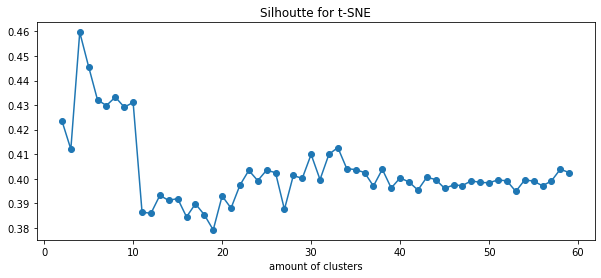

In [73]:
fig = plt.figure(figsize=(10,4))
from sklearn import cluster, metrics
silhouettes = []
for num_clusters in range(2,60):
    # with unique and randow initialization
    cls = cluster.KMeans(n_clusters = num_clusters,
                        init='k-means++')
    cls.fit(X_norm)
    # computing the shape coefficient
    silh = metrics.silhouette_score(X_norm,cls.labels_)
    silhouettes.append(silh)
    
plt.plot(range(2,60),silhouettes, marker='o')
plt.title('Silhoutte for t-SNE')
plt.xlabel('amount of clusters');

> Looking at the silhouete graph, we see that 4 or 5 would be the optimal number of classes, but as we would like a bit more classes to predict, we'll try the next optima : 8 and 9.

#### K-means with 8 clusters

In [74]:
kmeans = cluster.KMeans(n_clusters=8,init='k-means++')
kmeans.fit(X_norm);

X_labels = kmeans.labels_

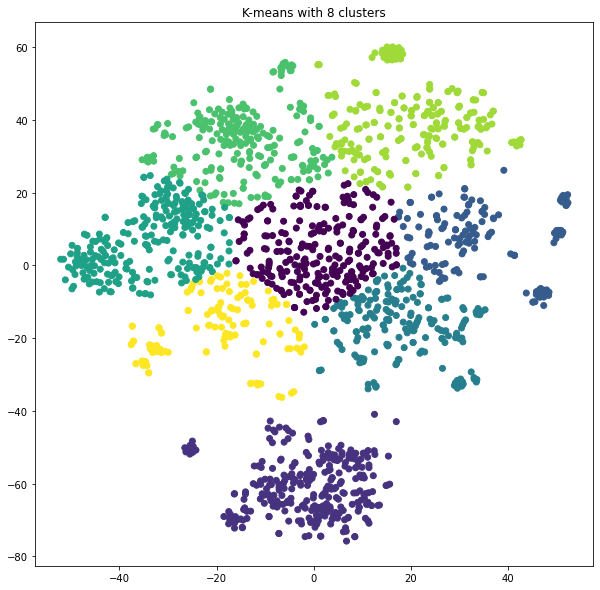

In [75]:
fig = plt.figure(figsize=(10,10))
plt.scatter(X_norm[:,0],X_norm[:,1],c=X_labels)
plt.title("K-means with 8 clusters");

#### K-means with 9 clusters

In [76]:
kmeans_9 = cluster.KMeans(n_clusters=9,init='k-means++')
kmeans_9.fit(X_norm);
X_labels_9 = kmeans_9.labels_

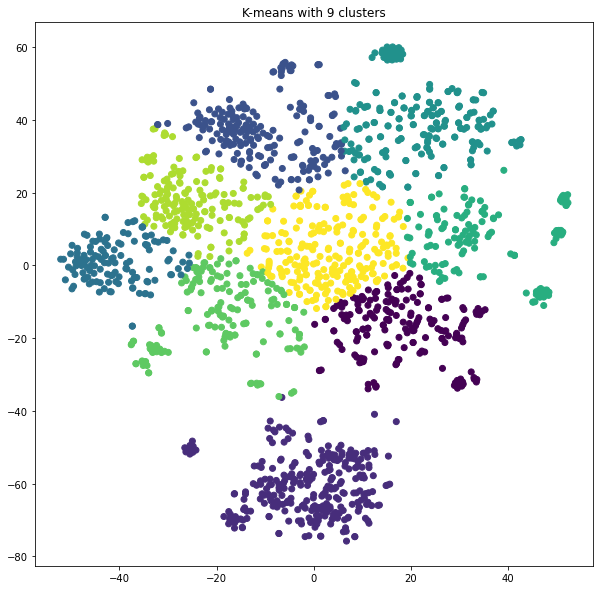

In [77]:
fig = plt.figure(figsize=(10,10))
plt.scatter(X_norm[:,0],X_norm[:,1],c=X_labels_9)
plt.title("K-means with 9 clusters");

#### Addding the different cluster labels to the dataframe

In [78]:
glove_tsne_df['labels_K_8'] = X_labels 
glove_tsne_df['labels_K_9'] = X_labels_9 

In [79]:
glove_tsne_df.sample(10, random_state=123)

emoji_names emoji_symbols          X          Y  labels_K_8  \
189      Person Pouting             🙎   4.359512  32.646908           6   
1052             Laptop             💻  24.294687 -15.904998           3   
954              Anchor             ⚓  15.272971  -7.929989           3   
472             Unicorn             🦄 -24.350945  12.979251           4   
147      Mechanical Leg             🦿   5.465548   6.134734           0   
785   ‍♂️ Men Wrestling          🤼‍♂️  18.933460  28.872482           6   
1628  🇹 Flag: Lithuania            🇱🇹   7.295269 -52.040989           1   
1373  Currency Exchange             💱   9.069926 -19.835104           3   
1588     🇾 Flag: Guyana            🇬🇾  -6.220050 -59.908859           1   
1387         Curly Loop             ➰ -25.759447  20.963030           4   

      labels_K_9  
189            2  
1052           0  
954            0  
472            7  
147            8  
785            4  
1628           1  
1373           0  
1588           1  
1387           7

#### Looking at the repartition per cluster for K=8 and K=9

In [80]:
base_color = sb.color_palette()[0]

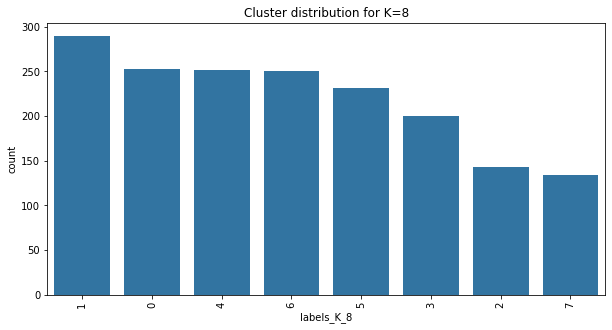

In [81]:
plt.figure(figsize = [10,5])
sb.countplot(data=glove_tsne_df,x='labels_K_8',order=glove_tsne_df.labels_K_8.value_counts().index,
            color=base_color)
plt.xticks(rotation=90)
plt.title('Cluster distribution for K=8');

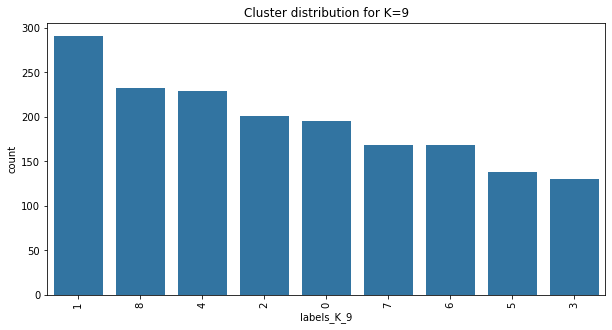

In [82]:
plt.figure(figsize = [10,5])
sb.countplot(data=glove_tsne_df,x='labels_K_9',order=glove_tsne_df.labels_K_9.value_counts().index,
            color=base_color)
plt.xticks(rotation=90)
plt.title('Cluster distribution for K=9');

In [83]:
fig = px.scatter(glove_tsne_df, x='X', y='Y', text='emoji_names', color='labels_K_8')
fig.update_traces(textposition='top center')
fig.update_layout(
        height=1200,
        width=1000,
        title_text="With 8 Clusters")
fig.show()

In [84]:
fig = px.scatter(glove_tsne_df, x='X', y='Y', text='emoji_names', color='labels_K_9')
fig.update_traces(textposition='top center')
fig.update_layout(
        height=1200,
        width=1000,
        title_text="With 9 Clusters")
fig.show()

In [85]:
help(print_samples_cluster)

Help on function print_samples_cluster in module helper_functions:

print_samples_cluster(df, label, n_lines=5)
    Prints samples for each of the clusters 
    
    Parameters:
        df (DataFrame): DataFrame containing emoji_names, emoji_symbols and K_means labels
        label (str): the chosen label (for example in our case: labels_K_8 or labels_K_9)
        n_linles (int): the amount of lines printed per cluster (default = 5)
    
    Returns:
        Prints samples for each of the clusters



In [86]:
print_samples_cluster(glove_tsne_df, 'labels_K_8',5)

Samples from cluster nb 0 
        emoji_names emoji_symbols  labels_K_8
998         Compass             🧭           0
627            Fire             🔥           0
1199      Cigarette             🚬           0
821    Cricket Game             🏏           0
858   Bow and Arrow             🏹           0

Samples from cluster nb 1 
          emoji_names emoji_symbols  labels_K_8
1586     🇺 Flag: Guam            🇬🇺           1
1522  🇸 Flag: Bahamas            🇧🇸           1
1720    🇴 Flag: Tonga            🇹🇴           1
1576    🇭 Flag: Ghana            🇬🇭           1
1489  ‍☠️ Pirate Flag          🏴‍☠️           1

Samples from cluster nb 2 
       emoji_names emoji_symbols  labels_K_8
882          Hotel             🏨           2
661          Onion             🧅           2
945   Kick Scooter             🛴           2
1245   Ten O’Clock             🕙           2
934     Automobile             🚗           2

Samples from cluster nb 3 
                          emoji_names emoji_symbols  la

In [87]:
print_samples_cluster(glove_tsne_df, 'labels_K_9',5)

Samples from cluster nb 0 
                  emoji_names emoji_symbols  labels_K_8
1035          ️ Shopping Bags            🛍️           3
1420            ️ Information            ℹ️           3
1427               ️ P Button            🅿️           3
1425  ️ O Button (Blood Type)            🅾️           3
849                Microphone             🎤           3

Samples from cluster nb 1 
                           emoji_names emoji_symbols  labels_K_8
1482                    Chequered Flag             🏁           1
1734  🇨 Flag: St. Vincent & Grenadines            🇻🇨           1
1662                    🇴 Flag: Norway            🇳🇴           1
1646                🇷 Flag: Mauritania            🇲🇷           1
1529   🇨 Flag: Cocos (Keeling) Islands            🇨🇨           1

Samples from cluster nb 2 
                 emoji_names emoji_symbols  labels_K_8
178    ‍🦳 Person: White Hair           🧑‍🦳           5
4    Grinning Squinting Face             😆           5
40                Lying Fa

> Even if the clustering seems good, it's still not optimal. Therefor we'll have a look at the emoji groups and subgroups used on Emojipedia

### Looking at the Emoji Dictionnary
source : https://unicode.org/Public/emoji/13.0/emoji-test.txt

**Categories from emojipedia**
>- 😃 Smileys & People
>- 🐻 Animals & Nature
>- 🍔 Food & Drink
>- ⚽ Activity
>- 🌇 Travel & Places
>- 💡 Objects
>- 🔣 Symbols
>- 🎌 Flags

In [88]:
dict_loc = "./Saved_Variables/unicode_emoji_df.csv"
emoji_dico = pd.read_csv(dict_loc)

In [89]:
emojis.head(3)

Unnamed: 0 emoji_symbol                       emoji_name emoji_code                                  emoji_description                  emoji_name_flag                             emoji_description_flag                           preprocessed_description                preprocessed_name                                avg_glove_embedding                       weighted_avg_glove_embedding                           avg_glove_name_embedding
0           0            😀                    Grinning Face    U+1F600  A yellow face with simple, open eyes and a bro...                    Grinning Face  Grinning Face A yellow face with simple, open ...  [grinning, face, yellow, face, simple, open, e...                 [grinning, face]  [-0.052879305279536826, 0.35330024240790187, 0...  [-0.039324820285070346, 0.334004988216541, 0.4...  [0.05953999608755112, 0.3728349953889847, 0.78...
1           1            😃      Grinning Face with Big Eyes    U+1F603  A yellow face with smiling eyes and a broad, o...      Grinning Face with Big Eyes  Grinning Face with Big Eyes A yellow face with...  [grinning, face, big, eyes, yellow, face, smil...      [grinning, face, big, eyes]  [-0.03141651058103889, 0.3569662036995093, 0.4...  [-0.0018917805929150847, 0.3461460879555455, 0...  [0.0406947482842952, 0.3938474878668785, 0.804...
2           2            😄  Grinning Face with Smiling Eyes    U+1F604  A yellow face with smiling eyes and a broad, o...  Grinning Face with Smiling Eyes  Grinning Face with Smiling Eyes A yellow face ...  [grinning, face, smiling, eyes, yellow, face, ...  [grinning, face, smiling, eyes]  [-0.05249443077341174, 0.36063511895410943, 0....  [-0.014824565082119826, 0.3497006255082595, 0....  [0.12064250092953444, 0.3266124948859215, 0.75...

In [90]:
emoji_dico.sample(5)

emoji                                              name          group        sub_group       codepoints
3742     ♻                                  recycling symbol        Symbols     other-symbol             267B
409     👁️                                               eye  People & Body       body-parts       1F441 FE0F
1965   🏃‍♀                                     woman running  People & Body  person-activity  1F3C3 200D 2640
2903     🍵                             teacup without handle   Food & Drink            drink            1F375
2457    🧘🏼  person in lotus position: medium-light skin tone  People & Body   person-resting      1F9D8 1F3FC

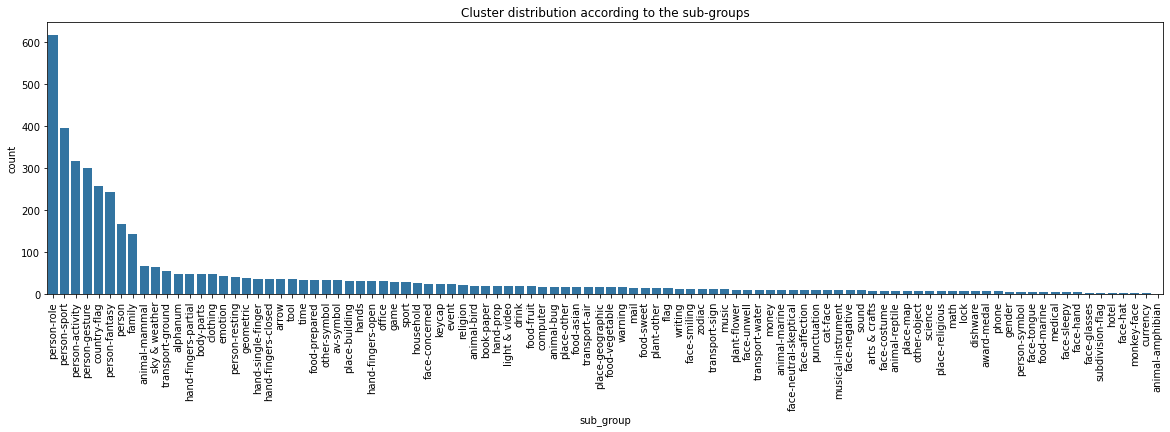

In [91]:
plt.figure(figsize = [20,5])
sb.countplot(data=emoji_dico,x='sub_group',order=emoji_dico.sub_group.value_counts().index,
            color=base_color)
plt.xticks(rotation=90)
plt.title('Cluster distribution according to the sub-groups');

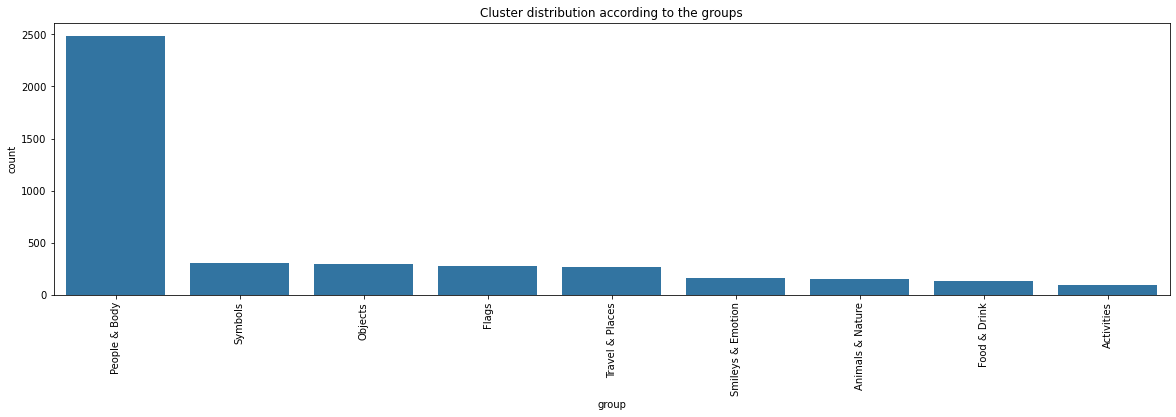

In [92]:
plt.figure(figsize = [20,5])
sb.countplot(data=emoji_dico,x='group',order=emoji_dico.group.value_counts().index,
            color=base_color)
plt.xticks(rotation=90)
plt.title('Cluster distribution according to the groups');

**Idea**
> - As there are too many sub-groups and that the "people & Body" Group is unbalance
> - Keeping the group labels for all groups but the "People & Body" Group, where we take the sub-groups

In [93]:
# Add a column according to this
emoji_dico['label_name'] = emoji_dico.apply(lambda row: row.sub_group if row.group == "People & Body" \
                                            else row.group, axis=1 )

In [94]:
# Test
emoji_dico.sample(20)

emoji                                       name          group          sub_group                  codepoints         label_name
2158   🚣‍♀️                          woman rowing boat  People & Body       person-sport        1F6A3 200D 2640 FE0F       person-sport
672      🙆🏻       person gesturing OK: light skin tone  People & Body     person-gesture                 1F646 1F3FB     person-gesture
967   👨🏻‍⚖️                 man judge: light skin tone  People & Body        person-role  1F468 1F3FB 200D 2696 FE0F        person-role
1940    👩‍🦽                 woman in manual wheelchair  People & Body    person-activity            1F469 200D 1F9BD    person-activity
563       🧓                               older person  People & Body             person                       1F9D3             person
3304      👚                            woman’s clothes        Objects           clothing                       1F45A            Objects
1164    👨‍✈                                  man pilot  People & Body        person-role             1F468 200D 2708        person-role
1484   👩🏾‍🍼  woman feeding baby: medium-dark skin tone  People & Body        person-role      1F469 1F3FE 200D 1F37C        person-role
3280      🧵                                     thread     Activities      arts & crafts                       1F9F5         Activities
2153   🚣🏽‍♂          man rowing boat: medium skin tone  People & Body       person-sport       1F6A3 1F3FD 200D 2642       person-sport
2209   ⛹️‍♂                          man bouncing ball  People & Body       person-sport         26F9 FE0F 200D 2642       person-sport
2362    🤼‍♂                              men wrestling  People & Body       person-sport             1F93C 200D 2642       person-sport
2916      🧉                                       mate   Food & Drink              drink                       1F9C9       Food & Drink
3951     🇨🇻                           flag: Cape Verde          Flags       country-flag                 1F1E8 1F1FB              Flags
1325     👷🏻       construction worker: light skin tone  People & Body        person-role                 1F477 1F3FB        person-role
2600     👬🏿          men holding hands: dark skin tone  People & Body             family                 1F46C 1F3FF             family
3629      ↕                              up-down arrow        Symbols              arrow                        2195            Symbols
2394   🤽🏿‍♀   woman playing water polo: dark skin tone  People & Body       person-sport       1F93D 1F3FF 200D 2640       person-sport
175       🖐                  hand with fingers splayed  People & Body  hand-fingers-open                       1F590  hand-fingers-open
3982     🇬🇫                        flag: French Guiana          Flags       country-flag                 1F1EC 1F1EB              Flags

In [95]:
# Amount of different label_names
emoji_dico['label_name'].nunique()

24

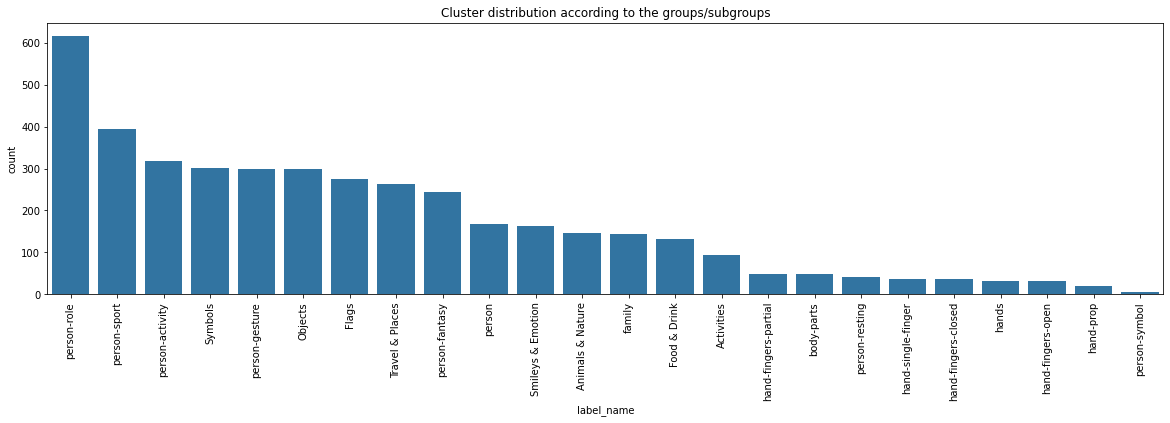

In [96]:
plt.figure(figsize = [20,5])
sb.countplot(data=emoji_dico,x='label_name',order=emoji_dico.label_name.value_counts().index,
            color=base_color)
plt.xticks(rotation=90)
plt.title('Cluster distribution according to the groups/subgroups');

In [97]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
emoji_dico['label_num']= label_encoder.fit_transform(emoji_dico['label_name']) 
  


In [98]:
emoji_dico.sample(15)

emoji                                  name             group             sub_group                  codepoints            label_name  label_num
1961   🏃🏾‍♂    man running: medium-dark skin tone     People & Body       person-activity       1F3C3 1F3FE 200D 2642       person-activity         17
4143     🇻🇪                       flag: Venezuela             Flags          country-flag                 1F1FB 1F1EA                 Flags          2
2764      🦂                              scorpion  Animals & Nature            animal-bug                       1F982      Animals & Nature          1
407       🦴                                  bone     People & Body            body-parts                       1F9B4            body-parts          8
4090     🇶🇦                           flag: Qatar             Flags          country-flag                 1F1F6 1F1E6                 Flags          2
2246  🏋🏻‍♂️  man lifting weights: light skin tone     People & Body          person-sport  1F3CB 1F3FB 200D 2642 FE0F          person-sport         22
206      🤏🏻        pinching hand: light skin tone     People & Body  hand-fingers-partial                 1F90F 1F3FB  hand-fingers-partial         12
3753      ✔                            check mark           Symbols          other-symbol                        2714               Symbols          6
1159  🧑🏾‍✈️          pilot: medium-dark skin tone     People & Body           person-role  1F9D1 1F3FE 200D 2708 FE0F           person-role         21
3579     ⚱️                           funeral urn           Objects          other-object                   26B1 FE0F               Objects          4
1584     🧙🏼          mage: medium-light skin tone     People & Body        person-fantasy                 1F9D9 1F3FC        person-fantasy         18
3760     ✳️                 eight-spoked asterisk           Symbols          other-symbol                   2733 FE0F               Symbols          6
1876  🧎🏾‍♂️   man kneeling: medium-dark skin tone     People & Body       person-activity  1F9CE 1F3FE 200D 2642 FE0F       person-activity         17
2523      👭                   women holding hands     People & Body                family                       1F46D                family          9
1342   👷‍♀️             woman construction worker     People & Body           person-role        1F477 200D 2640 FE0F           person-role         21

In [99]:
# Lookup table : emoji_symbol -> label_name
label_lookup = dict(zip(emoji_dico.emoji,emoji_dico.label_name))

In [100]:
with open('Saved_Variables/label_lookup.pkl', 'wb') as f:
    pickle.dump(label_lookup, f)

#### Using this lookup table to add it to the glove_tsne_df

In [101]:
weighted_glove_tsne_df['label_name_unicode'] = weighted_glove_tsne_df.emoji_symbols.apply(lambda x: label_lookup[x] \
                                                                       if x in label_lookup.keys() \
                                                                        else 'label_not_found')

In [102]:
weighted_glove_tsne_df.sample(5,random_state=123)

emoji_names emoji_symbols          X          Y label_name_unicode
189   Person Pouting             🙎  25.037052  24.266859     person-gesture
1052          Laptop             💻 -21.531141  -1.806977            Objects
954           Anchor             ⚓ -13.859016  -6.692446    Travel & Places
472          Unicorn             🦄  31.436134 -12.280780   Animals & Nature
147   Mechanical Leg             🦿  -0.147754  -2.897481         body-parts

In [103]:
# Are there a lot of "label_not_found" ?
weighted_glove_tsne_df[weighted_glove_tsne_df.label_name_unicode=='label_not_found']

emoji_names emoji_symbols          X          Y label_name_unicode
1751  󠁵󠁳󠁴󠁸󠁿 Flag for Texas (US-TX)        🏴󠁵󠁳󠁴󠁸󠁿 -57.161289 -12.150629    label_not_found

> Only one emoji_symbol wasn't found in the dictionary

In [104]:
# Let's correct it
emoji_texas = weighted_glove_tsne_df[weighted_glove_tsne_df.label_name_unicode=='label_not_found']['emoji_symbols']
emoji_texas = emoji_texas.values[0][0]
label_lookup[emoji_texas] = 'Flags'

In [105]:
emoji_texas

'🏴'

In [106]:
# label_encoder object knows how to understand word labels. 
lbl_name_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
weighted_glove_tsne_df['label_num']= lbl_name_encoder.fit_transform(weighted_glove_tsne_df['label_name_unicode']) 
  
weighted_glove_tsne_df['label_num'].nunique() 

25

In [107]:
weighted_X_norm = weighted_glove_tsne_df[['X','Y']].values

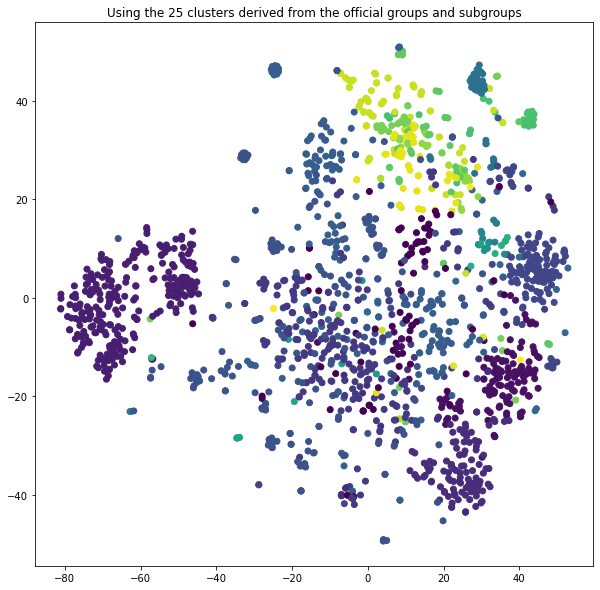

In [108]:
X_lbl_num = list(weighted_glove_tsne_df.label_num)

fig = plt.figure(figsize=(10,10))
plt.scatter(weighted_X_norm[:,0],weighted_X_norm[:,1],c=X_lbl_num)
plt.title("Using the 25 clusters derived from the official groups and subgroups");

<a id='help_function'></a>
## 4. Creating a help DataFrame for Dataset Creation 
<a href="#table">Back to the top </a>

In [109]:
help(df_4_dataset)

Help on function df_4_dataset in module helper_functions:

df_4_dataset(file, emoji_2_embedding_lookup, emoji_symb2emb_dic, n_words=5, n_emoji=5, distance_type='euclidean')
    Returns a DataFrame with nb of original sentence, subsentences and closest
        predicted emoji list for the subsentences
    
    Parameters:
        file (space nlp object): file we want to analyze
    
        emoji_2_embedding_lookup (dict): dictionnary with as keys the words of the
              corpus and the values the vector of that word
    
        emoji_symb2emb_dic (dict): keys emoji_symbols values averaged description Embedding
    
        n_words (int) : size of the sub sentence chunks
    
        n_emoji (int) : size of the predicted emoji list
    
        distance_type (str): default is "euclidiean", but also "cosine" possible
    
    
    Returns:
        A DataFrame with nb of original sentence, subsentences and closest
        predicted emoji list for the subsentences



In [110]:
warnings.filterwarnings('ignore')
df_choose_emoji = df_4_dataset(file_greek, glove_lookup, weighted_emoji_symb2emb_dic ,7,20,"euclidean")

In [111]:
df_choose_emoji.head(15)

num_sentence                                       sub_sentence                                     closest_emojis
0              0  STORY <SPACE> <SPACE> <SPACE> <SPACE> <SPACE> ...  [🧟, 📘, 🎞️, 📰, 🏩, 📗, 📕, 🕵️‍♀️, 📙, 👨‍👧, 〰️, ❤️, ...
1              1     PART I <SPACE> <SPACE> <SPACE> <SPACE> <SPACE>  [🪕, 🪁, 🩺, 🧇, ❣️, 🪀, 🧚, 🤍, 🪂, 🪓, 🏦, 👪, 〽️, 🩳, 🩱...
2              2                 HOW PERSEUS AND HIS MOTHER CAME TO  [🤶, 🎅, 👨‍👨‍👧‍👦, 👨‍👩‍👧, 👨‍👩‍👧‍👦, 👨‍👩‍👧‍👧, 👸, 👨‍...
3              2  SERIPHOS <SPACE> <SPACE> <SPACE> <SPACE> <SPAC...                                                 []
4              3                    Once upon a time there were two  [🔞, 🙌, 🙅, 💑, 🤍, 🎬, 💏, 👬, 🏃, 🏊, 🙅‍♂️, 🙋‍♂️, 🙋, ...
5              3     princes who were twins <SPACE> <SPACE> <SPACE>  [♊, 👑, 🎎, 👹, 🦇, 👨‍👨‍👧, 👸, 👨‍👨‍👧‍👦, 🐲, 👼, 🐏, 🙈,...
6              4          Their names were Acrisius and Proetus and  [☑️, 📌, ✔️, 💤, ✅, ✨, ⬇️, 🕵️, 🗿, ➡️, 🆖, ⬆️, ◀️,...
7              4                 they lived in the pleasant vale of  [🌺, 🎅, 🎍, 🌼, 🌻, 🌹, 🌸, 🌷, 💤, 🕊️, 🌵, 🏠, 🦄, ☘️, 🥀...
8              4           Argos far away in Hellas <SPACE> <SPACE>  [✨, ☄️, 🐚, 🌟, 🖋️, 🤫, 🦄, 🦗, ⚔️, 🦔, 🎯, 💩, 🌠, ✒️,...
9              5      They had fruitful meadows and vineyards sheep  [🌵, 🌴, 🐏, 🐃, 🎍, 🍓, 🍇, 🦌, 🥝, 🌳, 🌾, 🦙, 🌸, 🐚, 🍑, ...
10             5             and oxen great herds of horses feeding  [🐎, 🐂, 🐏, 🐕, 🐖, 🐃, 🐴, 🐐, 🐄, 🦌, 🐍, 🐘, 🦙, 🐾, 🐩, ...
11             5                     down in Lerna Fen and all that  [🍩, 🥟, 🐸, 🦂, 🐚, 🥒, 🦌, 💤, 🐏, 🐹, 🍀, 🍼, 🍔, 🐑, 🍿, ...
12             5                  men could need to make them blest  [📋, 😎, 🤗, 📄, 🙊, 🚶, 🙅, 🥱, 🏃, 📑, 📃, 🧑‍🤝‍🧑, 🙋, 😬,...
13             5            and yet they were wretched because they  [🚯, 😉, 🙈, 🙊, 🙉, 🦗, 😪, 💤, 👽, 😛, 😜, 😔, 😬, 🤪, 🤷, ...
14             5         were jealous of each other <SPACE> <SPACE>  [👺, 😍, 😘, 😉, 🥴, 😛, 😗, 🙈, 😙, 😳, 😪, 😝, 🥺, 👹, 😠, ...

In [42]:
# Test with pickle save list
with open('Saved_Variables/sub_sentence_list.pkl', 'wb') as f:
    pickle.dump(list(df_choose_emoji.sub_sentence), f)
    

with open('Saved_Variables/closest_emojis_list.pkl', 'wb') as f:
    pickle.dump(list(df_choose_emoji.closest_emojis), f)